# Customizing Plot Legends

In this section we'll take a look at customizing the placement and aesthetics of legends in Matplotlib.

The simplest legend can be created with the `plt.legend()` command, which automatically creates a legend for any labeled plot elements:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

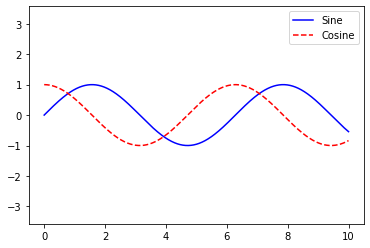

In [2]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

But we can go much further than that. For instance, we can specify the location and turn off the frame:

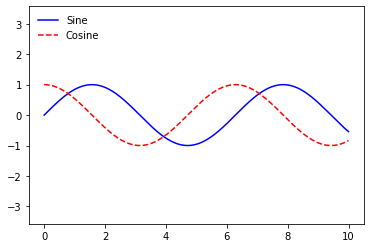

In [3]:
ax.legend(loc='upper left', frameon=False)
fig

We can use a rounded box (`fancybox`) or add a shadow, change the transparency  (alpha value) of the frame, or change the padding around the text:

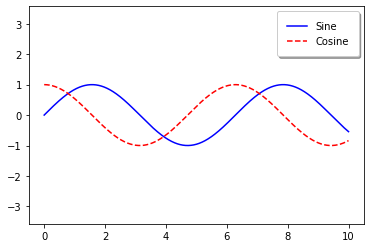

In [4]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

For more information on available legend options, see the `plt.legend` docstring.

## Choosing Elements for the Legend

As we have seen, the legend includes all labeled elements by default. If this is not what we intend to do, we can fine-tune which elements and labels appear in the legend by using the objects returned by plot commands. The `plt.plot()` command is able to create multiple lines at once, and returns a list of created line instances. Passing any of these to `plt.legend()` will tell it which to identify, along with the labels we'd like to specify:

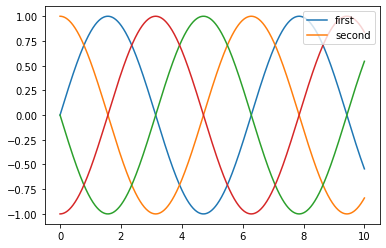

In [5]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second'], loc='upper right');

In practice it is generally clearer to use the first method, applying labels to the plot element's that we want to show on the legend:

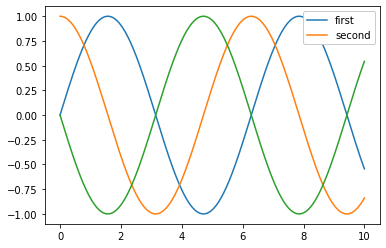

In [6]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2])
plt.legend(framealpha=1, frameon=True, loc='upper right');

By default, the legend ignores all elements without a `label` attribute set.

## Legend for Size of Points

Sometimes the legend default are not sufficient for the given visualization. Here is an example where we'll use the size of points to indicate populations of California cities. We'd like a legend that specified the sacle of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries:

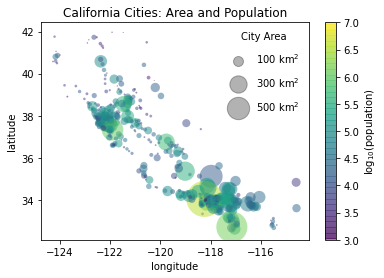

In [7]:
import pandas as pd

cities = pd.read_csv('../data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

The legend will always reference some object that is on the plot, so if we would like to display a particular shape we need to plot it. In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists. Notice that the legend only lists plot elements that have a label specified.

By plotting empty lists, we create labeled plot objects which are picked up by the legend, which can be used to tell us some useful information.

## Multiple Legends

Sometimes it is useful to add multiple legends to the same axes when designing a plot. Unfortunately, via the standard `legend` interface, it is only possible to create a single legend for the entire plot (creating a second legend with `plt.legend()` or `ax.legend()` would override the first). We can overcome this issue by creating a new legend artist from scratch, and then using the lower-level `ax.add_artist()` method to manually add the second artist to the plot:

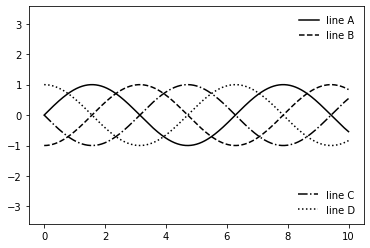

In [8]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);